## Accessing NDVI data for a given bounding box

In [ ]:
import planetary_computer
import pystac_client
import stackstac
import rasterio.plot
import matplotlib.pyplot as plt
import xarray as xr

# Define bounding box (lon/lat) change this as necessary - per pilot? per city?
bbox = [2.10, 41.35, 2.25, 41.45]

# Connect to Planetary Computer STAC
catalog = pystac_client.Client.open("https://planetarycomputer.microsoft.com/api/stac/v1")

# Search Sentinel-2 L2A - dates can be adjusted as necessary
search = catalog.search(
    collections=["sentinel-2-l2a"], # Sentinel-2 Level 2A collection
    bbox=bbox,
    datetime="2025-01-01/2025-07-31", # adjust dates as necessary
    query={"eo:cloud_cover": {"lt": 10}} # filter for low cloud cover
)

items = [planetary_computer.sign(item) for item in search.items()] # Sign items for access (neccesary for selecting viable data)


# Stack and compute NDVI
stack = stackstac.stack(items, assets=["B04", "B08"], bounds_latlon=bbox, epsg=4326) # Load the bands into dask array
red = stack.sel(band="B04").mean("time")
nir = stack.sel(band="B08").mean("time")
ndvi = (nir - red) / (nir + red) # NDVI calculation



In [ ]:
# Compute NDVI locally, from the lazy loading (dask) array
ndvi_local = ndvi.compute()


In [10]:
ndvi_local


<xarray.DataArray 'stackstac-918158b7f988717b8b4119d3b454a595' (y: 1246, x: 1255)> Size: 13MB
array([[ 0.41243132,  0.42853814,  0.39298197, ...,  0.07792256,
         0.10481856,  0.1037249 ],
       [ 0.41130769,  0.41362637,  0.38534473, ...,  0.03756661,
         0.07132335,  0.10194638],
       [ 0.42954106,  0.42525407,  0.38926851, ...,  0.05516709,
         0.06801678,  0.08320936],
       ...,
       [ 0.01594103,  0.01679851, -0.01202697, ..., -0.00756355,
        -0.00654272, -0.00621558],
       [ 0.01594103,  0.02906252,  0.01201388, ..., -0.00756355,
        -0.00654272, -0.00621558],
       [-0.00740234,  0.02906252,  0.01201388, ..., -0.00690974,
        -0.00172987, -0.00278841]], shape=(1246, 1255))
Coordinates: (12/17)
  * y                                        (y) float64 10kB 41.45 ... 41.35
  * x                                        (x) float64 10kB 2.1 2.1 ... 2.25
    s2:product_type                          <U7 28B 'S2MSI2A'
    s2:mgrs_tile                             <U5 20B '31TDF'
    sat:relative_orbit                       int64 8B 8
    s2:processing_baseline                   <U5 20B '05.11'
    ...                                       ...
    proj:code                                <U10 40B 'EPSG:32631'
    gsd                                      float64 8B 10.0
    proj:shape                               object 8B {10980}
    proj:transform                           object 8B {0.0, 10.0, 4600020.0,...
    proj:bbox                                object 8B {399960.0, 509760.0, 4...
    epsg                                     int64 8B 4326

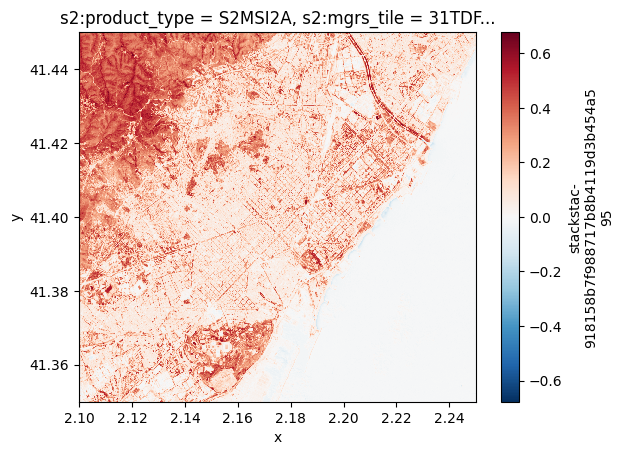

In [ ]:
ndvi.plot() # Visualize NDVI

In [ ]:
df = ndvi_local.to_dataframe().reset_index() # Convert to DataFrame for further analysis

,y,x,s2:product_type,s2:mgrs_tile,sat:relative_orbit,s2:processing_baseline,instruments,s2:saturated_defective_pixel_percentage,sat:orbit_state,s2:datatake_type,constellation,proj:code,gsd,proj:shape,proj:transform,proj:bbox,epsg,stackstac-918158b7f988717b8b4119d3b454a595
0,41.450021,2.099884,S2MSI2A,31TDF,8,05.11,msi,0.0,descending,INS-NOBS,Sentinel 2,EPSG:32631,10.0,{10980},"{0.0, 10.0, 4600020.0, -10.0, 399960.0}","{399960.0, 509760.0, 4600020.0, 4490220.0}",4326,0.412431
1,41.450021,2.100004,S2MSI2A,31TDF,8,05.11,msi,0.0,descending,INS-NOBS,Sentinel 2,EPSG:32631,10.0,{10980},"{0.0, 10.0, 4600020.0, -10.0, 399960.0}","{399960.0, 509760.0, 4600020.0, 4490220.0}",4326,0.428538
2,41.450021,2.100123,S2MSI2A,31TDF,8,05.11,msi,0.0,descending,INS-NOBS,Sentinel 2,EPSG:32631,10.0,{10980},"{0.0, 10.0, 4600020.0, -10.0, 399960.0}","{399960.0, 509760.0, 4600020.0, 4490220.0}",4326,0.392982
3,41.450021,2.100243,S2MSI2A,31TDF,8,05.11,msi,0.0,descending,INS-NOBS,Sentinel 2,EPSG:32631,10.0,{10980},"{0.0, 10.0, 4600020.0, -10.0, 399960.0}","{399960.0, 509760.0, 4600020.0, 4490220.0}",4326,0.413184
4,41.450021,2.100363,S2MSI2A,31TDF,8,05.11,msi,0.0,descending,INS-NOBS,Sentinel 2,EPSG:32631,10.0,{10980},"{0.0, 10.0, 4600020.0, -10.0, 399960.0}","{399960.0, 509760.0, 4600020.0, 4490220.0}",4326,0.412167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1563725,41.350030,2.249465,S2MSI2A,31TDF,8,05.11,msi,0.0,descending,INS-NOBS,Sentinel 2,EPSG:32631,10.0,{10980},"{0.0, 10.0, 4600020.0, -10.0, 399960.0}","{399960.0, 509760.0, 4600020.0, 4490220.0}",4326,-0.007151
1563726,41.350030,2.249585,S2MSI2A,31TDF,8,05.11,msi,0.0,descending,INS-NOBS,Sentinel 2,EPSG:32631,10.0,{10980},"{0.0, 10.0, 4600020.0, -10.0, 399960.0}","{399960.0, 509760.0, 4600020.0, 4490220.0}",4326,-0.007351
1563727,41.350030,2.249705,S2MSI2A,31TDF,8,05.11,msi,0.0,descending,INS-NOBS,Sentinel 2,EPSG:32631,10.0,{10980},"{0.0, 10.0, 4600020.0, -10.0, 399960.0}","{399960.0, 509760.0, 4600020.0, 4490220.0}",4326,-0.006910
1563728,41.350030,2.249824,S2MSI2A,31TDF,8,05.11,msi,0.0,descending,INS-NOBS,Sentinel 2,EPSG:32631,10.0,{10980},"{0.0, 10.0, 4600020.0, -10.0, 399960.0}","{399960.0, 509760.0, 4600020.0, 4490220.0}",4326,-0.001730
